In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

our_model_name = "se"
confusion_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
models = ['resnet', 'vgg', 'vit', 'densenet', 'efficientnet_v2_m', 'se']
model_official_names = ['ResNet50', "VGG16", "ViT_L_16", "DenseNet121", "Efficient_V2_M", "OurNewModel"]

In [ ]:
output_dict = None
with open('final_data_1.json', 'r') as file:
    new_model = json.load(file)

output_dict = None
with open('final_data.json', 'r') as file:
    output_dict = json.load(file)

output_dict['se'] = new_model['se_4']

In [ ]:
output_dict.keys()

dict_keys(['resnet', 'vgg', 'vit', 'densenet', 'efficientnet_v2_m', 'se'])

In [ ]:
def create_trendline(output_dict, metric_nm="accuracy", dataset = "train"):
    epochs = np.arange(1, 51)
    plt.figure(figsize=(20, 5))
    metric = "losses" if metric_nm == "loss" else "acc"
    colors = ['#F28522', '#00CD6C', '#009ADE', '#AF58BA', '#FFC61E', '#FF1F5B']

    for i, model in enumerate(output_dict.keys()):
        model_color = colors[i % len(colors)]
        model_metric = output_dict[model][f"{dataset}_{metric}"]
        plt.plot(epochs, model_metric, label=model_official_names[i], color=model_color, linestyle='-', linewidth = 2 if i == 5 else 1)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend()
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel(metric_nm.capitalize())
    plt.show()

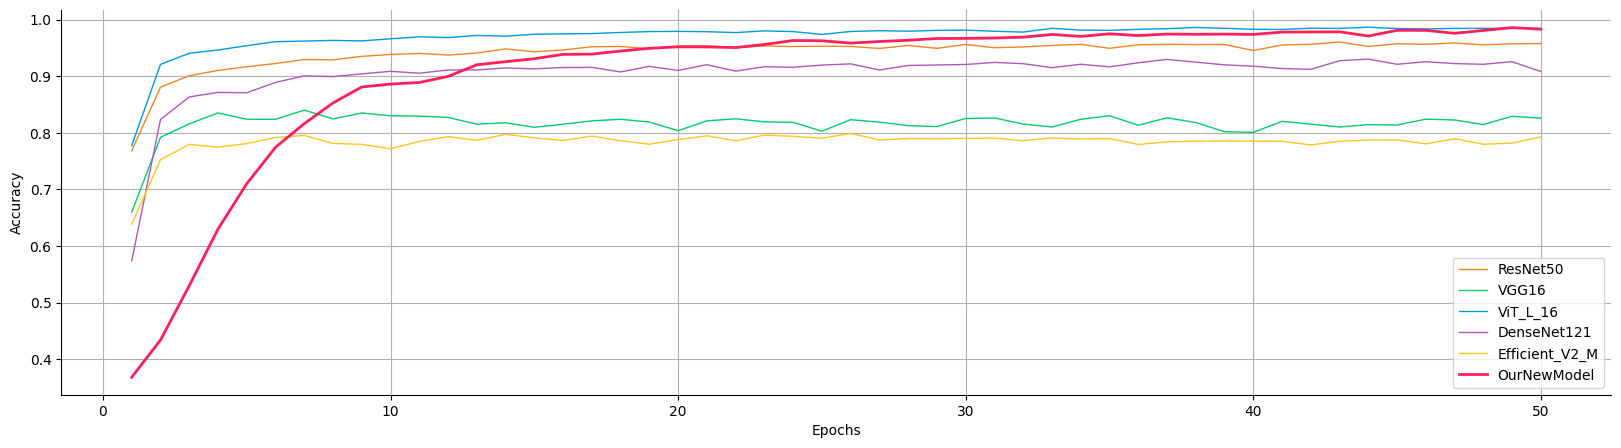

In [ ]:
# Train accuracy trendline
create_trendline(output_dict, "accuracy", "train")

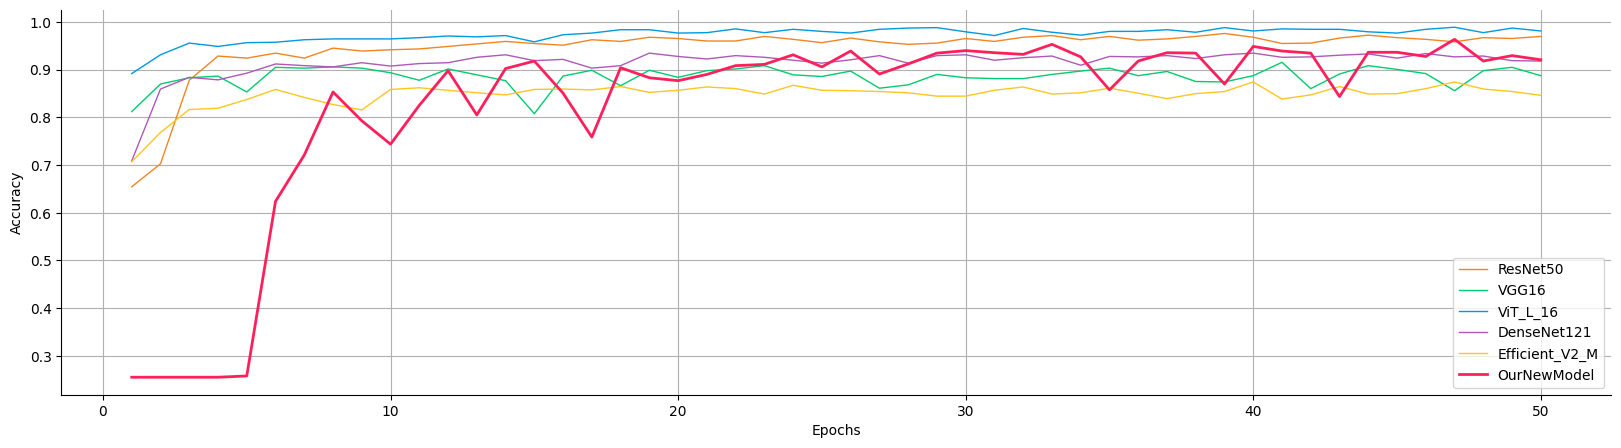

In [ ]:
# Valid accuracy trendline
create_trendline(output_dict, "accuracy", "valid")

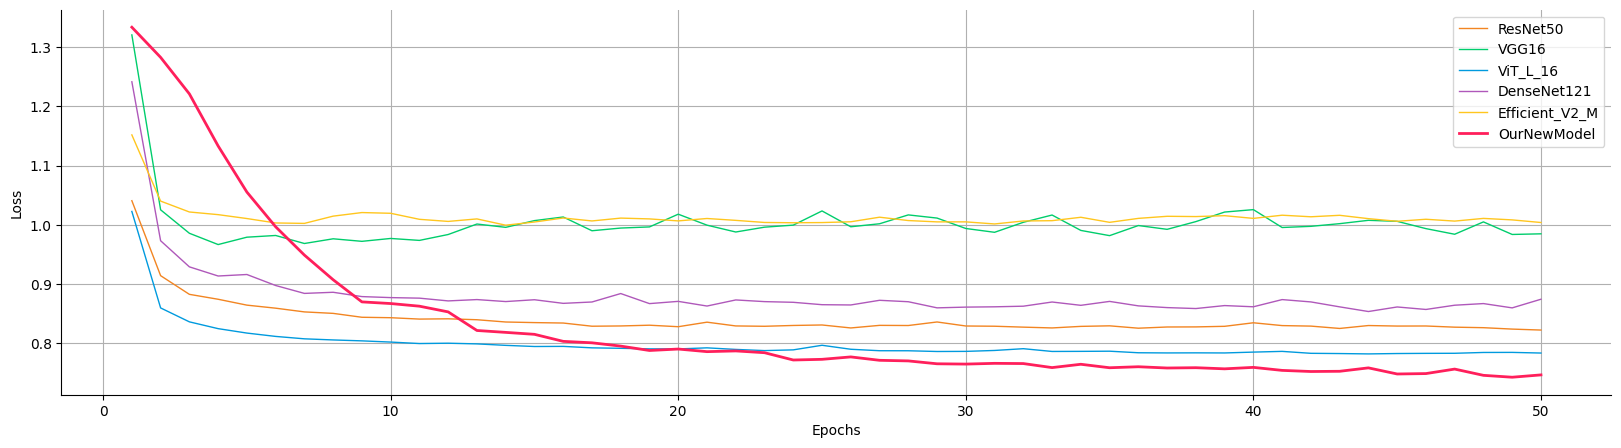

In [ ]:
# Train loss trendline
create_trendline(output_dict, "loss", "train")

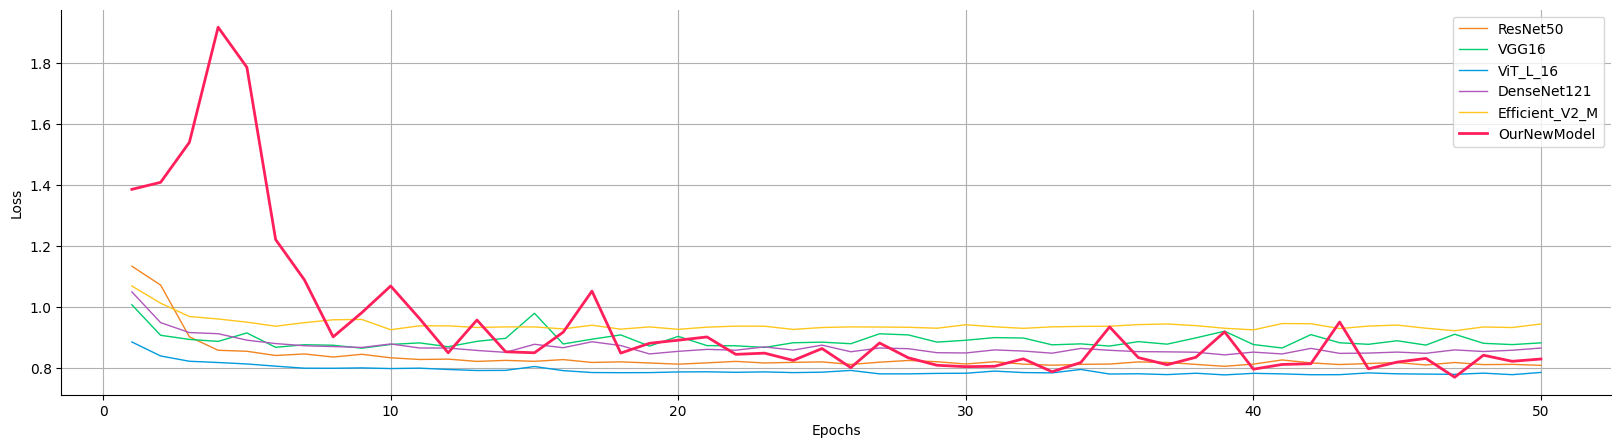

In [ ]:
# Valid loss trendline
create_trendline(output_dict, "loss", "valid")

In [ ]:
import pandas as pd

def category_barplot(category):
    accuracy, f1, precision, recall = [], [], [], []
    for model in models:
        f1_cur = output_dict[model]["by_category_metric"][category]["F1 Score"]
        recall_cur = output_dict[model]["by_category_metric"][category]["Recall"]
        accuracy_cur = output_dict[model]["by_category_metric"][category]["Accuracy"]
        f1_cur = f1_cur if f1_cur <= 1 else f1_cur / 100
        recall_cur = recall_cur if recall_cur <= 1 else recall_cur / 100
        accuracy_cur = accuracy_cur if accuracy_cur <= 1 else accuracy_cur / 100
        precision_cur = f1_cur * recall_cur / (2 * recall_cur - f1_cur)

        accuracy.append(accuracy_cur)
        f1.append(f1_cur)
        precision.append(precision_cur)
        recall.append(recall_cur)

    df = pd.DataFrame({'accuracy': accuracy, 'f1': f1, "precision": precision, "recall": recall}, index = model_official_names)



    ax = df.plot.bar(rot=0, figsize=(20, 3), color = ['#FF1F5B', '#00CD6C', '#009ADE', '#AF58BA'])

    ax.set_ylabel(category.capitalize())
    plt.show()

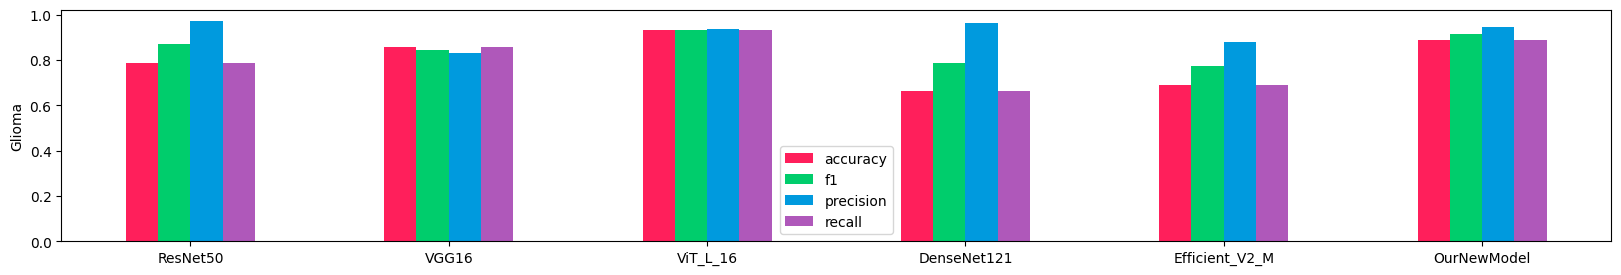

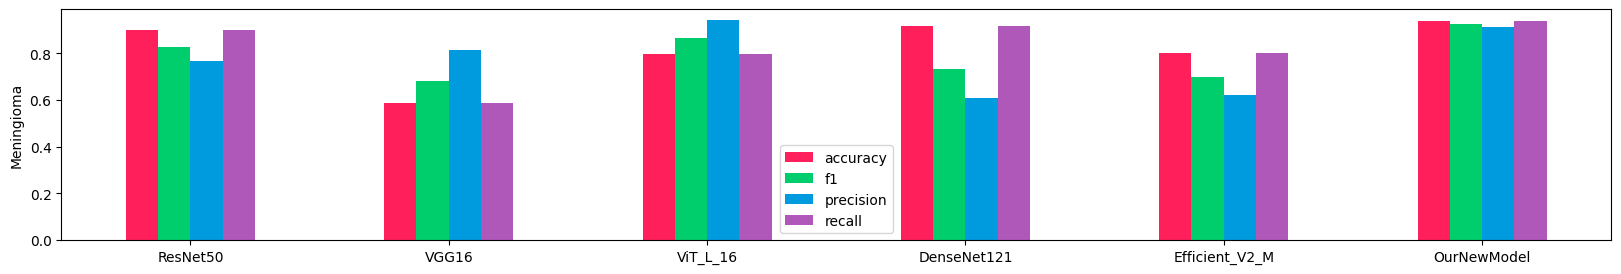

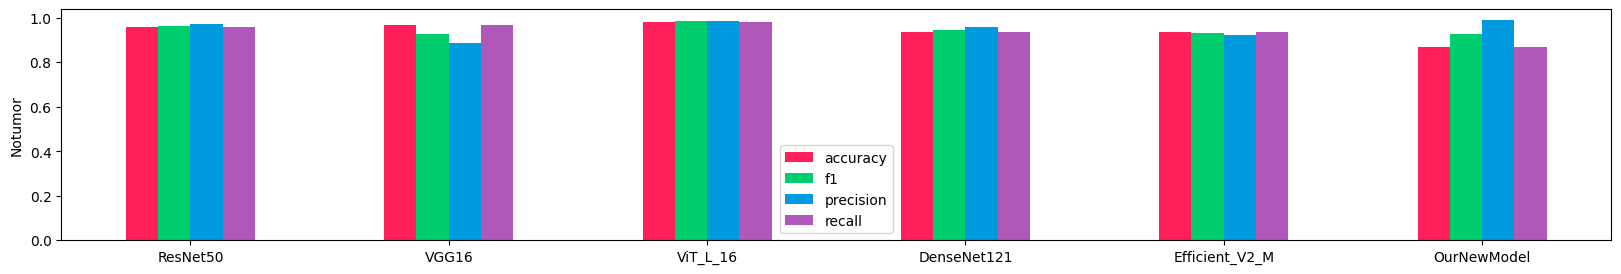

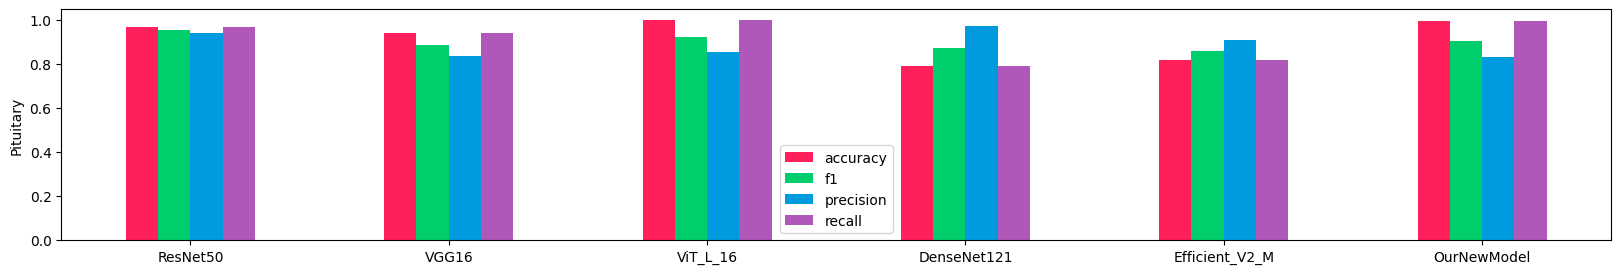

In [ ]:
for category in confusion_labels:
    category_barplot(category)

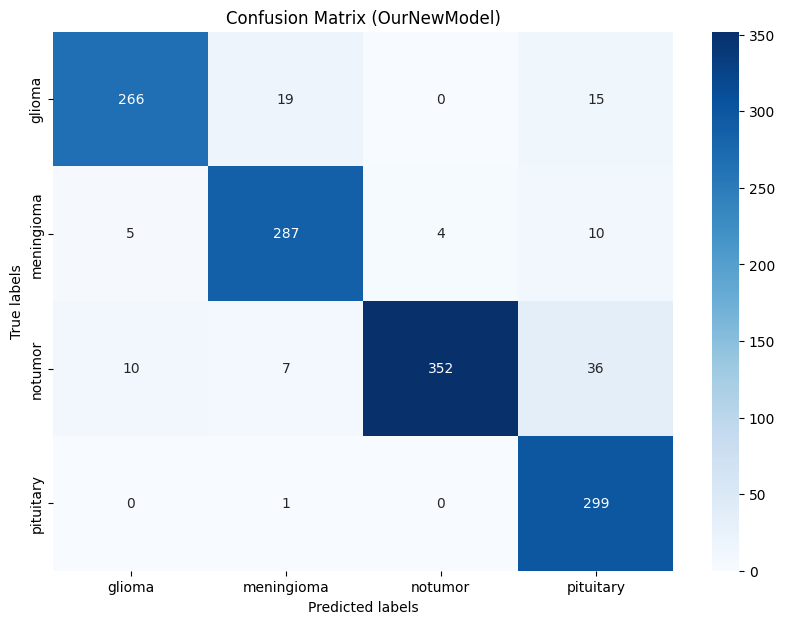

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(output_dict[our_model_name]["true"], output_dict[our_model_name]["preds"])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=confusion_labels, yticklabels=confusion_labels)

# Adding titles and labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix ({model_official_names[-1]})')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


df_metrics = pd.DataFrame(data = {
    "accuracy": [accuracy_score(output_dict[model]["true"], output_dict[model]["preds"]) for model in output_dict.keys()],
    "f1_score": [f1_score(output_dict[model]["true"], output_dict[model]["preds"], average = "macro") for model in output_dict.keys()],
    "f1_score (weighted)": [f1_score(output_dict[model]["true"], output_dict[model]["preds"], average = "weighted") for model in output_dict.keys()],
    "precision": [precision_score(output_dict[model]["true"], output_dict[model]["preds"], average = "macro") for model in output_dict.keys()],
    "precision (weighted)": [precision_score(output_dict[model]["true"], output_dict[model]["preds"], average = "weighted") for model in output_dict.keys()],
    "recall": [recall_score(output_dict[model]["true"], output_dict[model]["preds"], average = "macro") for model in output_dict.keys()],
    "recall (weighted)": [recall_score(output_dict[model]["true"], output_dict[model]["preds"], average = "weighted") for model in output_dict.keys()]
}, index = output_dict.keys())

df_metrics

,accuracy,f1_score,f1_score (weighted),precision,precision (weighted),recall,recall (weighted)
resnet,0.907704,0.903988,0.908441,0.912239,0.916196,0.903346,0.907704
vgg,0.848207,0.834626,0.841220,0.841917,0.845392,0.839034,0.848207
vit,0.930587,0.925290,0.929604,0.929535,0.934043,0.926908,0.930587
densenet,0.836766,0.833885,0.842418,0.874191,0.879606,0.827692,0.836766
efficientnet_v2_m,0.821510,0.816100,0.824605,0.833142,0.839303,0.811614,0.821510
se,0.918383,0.918157,0.918748,0.919988,0.925469,0.922594,0.918383
